In [1]:
import pandas as pd
from pandas.core.series import Series
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import mapply
mapply.init(n_workers=7, progressbar=True)


# Read the data
INCIDENTS = '../../dataset/data-raw/incidents.csv'
POVERTYYEAY = '../../dataset/data-raw/povertyByStateYear.csv'
STATEDISHOUSE = '../../dataset/data-raw/year_state_district_house.csv'
POPULATION = '../../dataset/data-raw/population.csv'

incidents = pd.read_csv(INCIDENTS)
poverty = pd.read_csv(POVERTYYEAY)
state_district_house = pd.read_csv(STATEDISHOUSE)
population = pd.read_csv(POPULATION, index_col=0)

incidents['state'] = incidents['state'].str.upper()
poverty['state'] = poverty['state'].str.upper()
state_district_house['state'] = state_district_house['state'].str.upper()

incidents['date_year'] = incidents['date'].str.split('-').str[0].astype(int)
incidents['date_month'] = incidents['date'].str.split('-').str[1].astype(int)
incidents['date_day'] = incidents['date'].str.split('-').str[2].astype(int)
del incidents['date']

population['NAME'] = population['NAME'].str.upper()

incidents = incidents[['date_year', 'date_month', 'date_day', 'state', 'city_or_county', 'latitude', 'longitude', 'congressional_district', 'min_age_participants', 'avg_age_participants', 'max_age_participants', 'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants', 'incident_characteristics1']].copy()


/tmp/ipykernel_11246/3238715173.py:16: DtypeWarning: Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  incidents = pd.read_csv(INCIDENTS)


In [2]:
population_clean = population.copy()
population_clean = population_clean.drop(columns=['CENSUS2010POP', 'ESTIMATESBASE2010'])
population_clean.columns = population_clean.columns.str.removeprefix('POPESTIMATE')
# given columns like 2010, 2011, ... 2019, we want to have a column year and a column population
population_clean = population_clean.melt(id_vars=['NAME'], var_name='YEAR', value_name='state_population')
population_clean["YEAR"] = population_clean["YEAR"].astype(float)

In [3]:
incidents['incident_characteristics1'].unique()

charateristics_translate = {
    'Shot - Wounded/Injured': 'SHOT_INJURED',
    'Shot - Dead (murder, accidental, suicide)': 'SHOT_DEAD',
    'Institution/Group/Business': 'INSTITUTION',
    'Shots Fired - No Injuries': 'SHOTS_FIRED_UNHARMED',
    'Non-Shooting Incident': 'NON_SHOOTING',
    'Armed robbery with injury/death and/or evidence of DGU found': 'ARMED_ROBBERY',
    'Defensive Use': 'DEFENSIVE_USE',
    'Shots fired, no action (reported, no evidence found)': 'SHOTS_FIRED_UNCONCLUSIVE',
    'TSA Action': 'TSA_ACTION',
    'Gun(s) stolen from owner': 'STOLEN_GUN',
    'Brandishing/flourishing/open carry/lost/found': 'MISC',
    'Accidental Shooting': 'SHOTS_ACCIDENTAL',
    'Possession (gun(s) found during commission of other crimes)': 'UNEXPECTED_GUN',
    'Domestic Violence': 'DOMESTIC_VIOLENCE',
    'Car-jacking': 'CAR_JACKING',
    'Drug involvement': 'DRUG_INVOLVEMENT',
    'Attempted Murder/Suicide (one variable unsuccessful)': 'ATTEMPTED_MURDER-SUICIDE',
    'Home Invasion': 'HOME_INVASION',
    'Pistol-whipping': 'PISTOL_WHIPPING',
    'Officer Involved Incident': 'OFFICER_INVOLVED',
    'ATF/LE Confiscation/Raid/Arrest': 'ATL-LE_CONFISCATION',
    'Suicide - Attempt': 'SUICIDE_ATTEMPT',
    'Kidnapping/abductions/hostage': 'KIDNAPPING',
    'Possession of gun by felon or prohibited person': 'FELON_POSSESSION',
    'Gang involvement': 'GANG_INVOLVEMENT',
    'Murder/Suicide': 'MURDER-SUICIDE',
    'Animal shot/killed': 'SHOT_KILLED_ANIMAL',
    'Bar/club incident - in or around establishment': 'BAR-CLUB_INCIDENT',
    'Sex crime involving firearm': 'SEX_CRIME_WITH_FIREARM',
    'School Incident': 'SCHOOL',
    'Non-Aggression Incident': 'NON_AGGRESSION',
    'Drive-by (car to street, car to car)': 'DRIVE_BY',
    'Gun buy back action': 'GUN_BUY_BACK',
    'Gun shop robbery or burglary': 'GUN_SHOP_ROBBERY',
    'Stolen/Illegally owned gun{s} recovered during arrest/warrant': 'ILLEGAL_GUN_RECOVERY',
    'Guns stolen from law enforcement': 'GUNS_STOLEN_FROM_LE',
    'Suicide^': 'SUICIDE',
    'Implied Weapon': 'IMPLIED_WEAPON',
    'Criminal act with stolen gun': 'CRIMINAL_ACT_WITH_STOLEN_GUN',
    'Gun at school, no death/injury - elementary/secondary school': 'SCHOOL_GUN_POSSESSION',
    'Road rage': 'ROAD_RAGE',
    'BB/Pellet/Replica gun': 'FAKE_GUN',
    'LOCKDOWN/ALERT ONLY: No GV Incident Occurred Onsite': 'LOCKDOWN_ALERT_ONLY',
    'Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)': 'MASS_SHOOTING',
    'House party': 'HOUSE_PARTY',
    'ShotSpotter': 'SHOT_SPOTTER',
    'Child Involved Incident': 'CHILD_INVOLVED_INCIDENT',
    'Under the influence of alcohol or drugs (only applies to the subject/suspect/perpetrator )': 'UNDER_INFLUENCE',
    'Spree Shooting (multiple victims, multiple locations)': 'SPREE_SHOOTING',
    'Hate crime': 'HATE_CRIME',
    'Unlawful purchase/sale': 'UNLAWFUL_PURCHASE_SALE',
    'Gun range/gun shop/gun show shooting': 'GUN_SHOP_SHOOTING',
}

In [4]:
# set non-numeric values to NaN in columns supposed to be numeric

objcols = incidents.select_dtypes(include=['object']).columns
objcols = objcols.drop(['state', 'city_or_county', 'incident_characteristics1'])

for col in objcols:
    incidents[col] = incidents[col].mapply(pd.to_numeric, errors='coerce')

/home/simone/Unipi/InProgress/DM/DM/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

/home/simone/Unipi/InProgress/DM/DM/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

/home/simone/Unipi/InProgress/DM/DM/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

/home/simone/Unipi/InProgress/DM/DM/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

/home/simone/Unipi/InProgress/DM/DM/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

/home/simone/Unipi/InProgress/DM/DM/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

In [5]:
# Infer the congressional district when missing as the most common one in the city
# TO-OPTIMIZE: it would be faster to crack RSA-2048 on a TI-84
def find_cd(row):
    df = incidents[(incidents['state'] == row['state']) * (incidents['city_or_county'] == row['city_or_county'])]
    # find the most common congressional district
    vc = df['congressional_district'].value_counts()
    if vc.empty:
        row['congressional_district'] = np.nan
        return row
    cd = vc.idxmax()
    row['congressional_district'] = cd
    return row

# set out-of-semnsible ranga values to NaN
def sensibleValues(row):
    # --- range checks ---
    if row['date_year'] > 2020:
        row['date_year'] = np.nan
    if row['min_age_participants'] > 110 or row['min_age_participants'] < 0:
        row['min_age_participants'] = np.nan
    if row['avg_age_participants'] > 110 or row['avg_age_participants'] < 0:
        row['avg_age_participants'] = np.nan
    if row['max_age_participants'] > 110 or row['max_age_participants'] < 0:
        row['max_age_participants'] = np.nan
    # 103 is the maximum value of n_participants
    if row['n_participants_child'] > 103 or row['n_participants_child'] < 0:
        row['n_participants_child'] = np.nan
    if row['n_participants_teen'] > 103 or row['n_participants_teen'] < 0:
        row['n_participants_teen'] = np.nan
    if row['n_participants_adult'] > 103 or row['n_participants_adult'] < 0:
        row['n_participants_adult'] = np.nan
    if row['n_killed'] > 103 or row['n_killed'] < 0:
        row['n_killed'] = np.nan
    if row['n_injured'] > 103 or row['n_injured'] < 0:
        row['n_injured'] = np.nan
    if row['n_arrested'] > 103 or row['n_arrested'] < 0:
        row['n_arrested'] = np.nan
    if row['n_unharmed'] > 103 or row['n_unharmed'] < 0:
        row['n_unharmed'] = np.nan
    return row


sincidents = incidents.mapply(sensibleValues, axis=1)

sincidents['state_city'] = sincidents['state'] + "-" + sincidents['city_or_county']
cd_df = sincidents[['state_city', 'congressional_district']]
cd_vc = cd_df.groupby('state_city')['congressional_district'].value_counts()
cd_vc = cd_vc.reset_index(name='count')
cd_vc = cd_vc.groupby('state_city').head(1)

def fix_cd(row):
    if np.isnan(row['congressional_district']):
        should_be = cd_vc[cd_vc['state_city'] == row['state_city']]
        if should_be.empty:
            row['congressional_district'] = np.nan
        else:
            row['congressional_district'] = should_be['congressional_district'].values[0]
    return row

sincidents = sincidents.mapply(fix_cd, axis=1)
sincidents = sincidents.drop('state_city', axis=1)

/home/simone/Unipi/InProgress/DM/DM/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

/home/simone/Unipi/InProgress/DM/DM/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

In [6]:
# given the groups 
#   (n_participants)
#   (n_males, n_females)
#   (n_participants_child, n_participants_teen, n_participants_adult)
#   (n_killed, n_injured, n_arrested, n_unharmed)
# we find and solve inconsistencies between their sums, keeping the original proportions
# Example:
#   n_participants = 10
#   n_participants_child
#       + n_participants_teen
#       + n_participants_adult = 10
#   n_males = 2
#   n_females = 6
# then the most probable values (according to our assumptions) are groups that sum to 10 so:
#   n_males => 3
#   n_females => 7

from random import randint, choice

# Don't ask, it works (maybe)
def mf(row):
    mf = row['n_males'] + row['n_females']
    cta = row['n_participants_child'] + row['n_participants_teen'] + row['n_participants_adult']
    kiau = row['n_killed'] + row['n_injured'] + row['n_arrested'] + row['n_unharmed']
    p = row['n_participants']

    ret = 0b0000
    if np.isnan(mf):
        ret |= 0b1000
    if np.isnan(cta):
        ret |= 0b0100
    if np.isnan(kiau):
        ret |= 0b0010
    if np.isnan(p):
        ret |= 0b0001


    if mf == cta == kiau == p:
        return 0b0000 | ret
    elif mf == cta == kiau:
        return 0b0001 | ret
    elif mf == cta == p:
        return 0b0010 | ret
    elif mf == kiau == p:
        return 0b0100 | ret
    elif cta == kiau == p:
        return 0b1000 | ret
    elif mf == p:
        return 0b0110 | ret
    elif cta == p:
        return 0b1010 | ret
    elif kiau == p:
        return 0b1100 | ret
    elif mf == cta:
        return 0b0011 | ret
    elif mf == kiau:
        return 0b0101 | ret
    elif cta == kiau:
        return 0b1001 | ret
    return 0b1111

def perc_calc(vals: list):
    s = np.sum(vals)
    if s == 0:
        return 1/len(vals)
    return vals[0] / s

    
def nannifyErrors(row):
    err_bits = mf(row)
    err_p = err_bits & 0b0001
    err_mf = err_bits & 0b1000
    err_cta = err_bits & 0b0100
    err_kiau = err_bits & 0b0010

    ref = row['n_participants'] if not err_p else \
        row['n_males'] + row['n_females'] if not err_mf else \
        row['n_participants_child'] + row['n_participants_teen'] + row['n_participants_adult'] if not err_cta else \
        row['n_killed'] + row['n_injured'] + row['n_arrested'] + row['n_unharmed'] if not err_kiau else \
        np.nan
    
    if np.isnan(ref):
        row['n_participants'] = row['n_males'] = row['n_females'] = row['n_participants_child'] = row['n_participants_teen'] = row['n_participants_adult'] = row['n_killed'] = row['n_injured'] = row['n_arrested'] = row['n_unharmed'] = np.nan
        return row

    if err_p:
        row['n_participants'] = ref
    if err_mf:
        p_m = perc_calc([row['n_males'], row['n_females']])
        p_f = 1 - p_m
        # remove float errors
        p_f = p_f if p_f > 1e-6 or np.isnan(p_f) else 0
        row['n_males'] = np.floor(ref * p_m)
        row['n_females'] = np.floor(ref * p_f)
        diff = ref - (row['n_males'] + row['n_females'])
        if diff != 0:
            # With 1/2 probability add the difference to males of females
            row['n_males' if randint(0,1) else 'n_females'] += diff
    if err_cta:
        p_c = perc_calc([row['n_participants_child'], row['n_participants_teen'], row['n_participants_adult']])
        p_t = perc_calc([row['n_participants_teen'], row['n_participants_child'], row['n_participants_adult']])
        p_a = 1 - p_c - p_t
        # remove float errors
        p_a = p_a if p_a > 1e-6 or np.isnan(p_a) else 0
        row['n_participants_child'] = np.floor(ref * p_c)
        row['n_participants_teen'] = np.floor(ref * p_t)
        row['n_participants_adult'] = np.floor(ref * p_a)
        diff = ref - (row['n_participants_child'] + row['n_participants_teen'] + row['n_participants_adult'])
        if diff != 0:
            to_check = []
            if row['n_participants_child'] != 0:
                to_check.append('n_participants_child')
            if row['n_participants_teen'] != 0:
                to_check.append('n_participants_teen')
            if row['n_participants_adult'] != 0:
                to_check.append('n_participants_adult')
            if len(to_check) == 0:
                to_check = ['n_participants_child', 'n_participants_teen', 'n_participants_adult']
            row[choice(to_check)] += diff
    if err_kiau:
        p_k = perc_calc([row['n_killed'], row['n_injured'], row['n_arrested'], row['n_unharmed']])
        p_i = perc_calc([row['n_injured'], row['n_killed'], row['n_arrested'], row['n_unharmed']])
        p_a = perc_calc([row['n_arrested'], row['n_killed'], row['n_injured'], row['n_unharmed']])
        p_u = 1 - p_k - p_i - p_a
        # remove float errors
        p_u = p_u if p_u > 1e-6 or np.isnan(p_u) else 0
        row['n_killed'] = np.floor(ref * p_k)
        row['n_injured'] = np.floor(ref * p_i)
        row['n_arrested'] = np.floor(ref * p_a)
        row['n_unharmed'] = np.floor(ref * p_u)
        diff = ref - (row['n_killed'] + row['n_injured'] + row['n_arrested'] + row['n_unharmed'])
        if diff != 0:
            to_check = []
            if row['n_killed'] != 0:
                to_check.append('n_killed')
            if row['n_injured'] != 0:
                to_check.append('n_injured')
            if row['n_arrested'] != 0:
                to_check.append('n_arrested')
            if row['n_unharmed'] != 0:
                to_check.append('n_unharmed')
            if len(to_check) == 0:
                to_check = ['n_killed', 'n_injured', 'n_arrested', 'n_unharmed']
            row[choice(to_check)] += diff
    return row



diff = sincidents.mapply(mf, axis=1)
print('DONE diff')
# incidents without problems
dncidents = sincidents[diff == 0b0000]
print('DONE dncidents')
# incidents with problems
wncidents = sincidents[diff != 0b0000].mapply(nannifyErrors, axis=1)
print('DONE wncidents')

# dncidents = incidents.iloc[0:10000].apply(nannifyErrors, axis=1)

/home/simone/Unipi/InProgress/DM/DM/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

DONE diff
DONE dncidents


/home/simone/Unipi/InProgress/DM/DM/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

DONE wncidents


In [7]:
CLEAN = False
if CLEAN:
    # Bring forward cleaned rows along with the `factory clean` ones
    wdincidents = pd.concat([wncidents, dncidents], ignore_index=False)
    # shuffle the rows to mix the incidents with problems (wncidents) with the others (dncidents)
    wdincidents = wdincidents.sample(frac=1)
else:
    # Bring forward only rows with no inconsistencies on n_participants groups
    wdincidents = dncidents.copy()
    wdincidents = wdincidents.sample(frac=1)

In [8]:
cincidents = wdincidents.copy()

print(tabulate(pd.DataFrame(cincidents.isnull().sum(axis=0)).T, headers='keys', tablefmt='psql'))

# cincidents['n_nan'] = cincidents.isnull().sum(axis=1)
# cincidents['n_nan'].value_counts().sort_index().plot.bar()

# 425 bad rows
cincidents = cincidents[~cincidents['congressional_district'].isnull()]
# 326 bad rows
cincidents = cincidents[~cincidents['incident_characteristics1'].isnull()]
# remove all rows where the n_participants groups are all NaN
cincidents = cincidents[~(cincidents[['n_participants', 'n_males', 'n_females', 'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed']].isnull().sum(axis=1) == 10)]
print(tabulate(pd.DataFrame(cincidents.isnull().sum(axis=0)).T, headers='keys', tablefmt='psql'))
# drop duplicates
cincidents = cincidents.drop_duplicates()

print(cincidents.shape[0] / incidents.shape[0])

if CLEAN:
    # TEMPORARY: Fix all NaNs with the median of the column
    # for col in ['n_participants', 'n_males', 'n_females', 'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed']:
    for col in cincidents.select_dtypes(include=['float64']).columns:
        median = cincidents[col].median()
        cincidents[col] = cincidents[col].fillna(median)
    # Recheck all participant groups sum to n_participants
    cincidents = cincidents.mapply(nannifyErrors, axis=1)
else:
    cincidents = cincidents.dropna()


# set as number of days since 2010-01-01
cincidents['timestamp'] = (pd.to_datetime(cincidents[['date_year', 'date_month', 'date_day']].astype(int).astype(str).apply(lambda x: '-'.join(x), axis=1)).astype(int) - pd.to_datetime(['2010-01-04']).astype(int)[0]) / 86400000000000

# cincidents = cincidents.drop(['date_year', 'date_month', 'date_day'], axis=1)
print(tabulate(pd.DataFrame(cincidents.isnull().sum(axis=0)).T, headers='keys', tablefmt='psql'))

+----+-------------+--------------+------------+---------+------------------+------------+-------------+--------------------------+------------------------+------------------------+------------------------+------------------------+-----------------------+------------------------+-----------+-------------+------------+-------------+--------------+--------------+------------------+-----------------------------+
|    |   date_year |   date_month |   date_day |   state |   city_or_county |   latitude |   longitude |   congressional_district |   min_age_participants |   avg_age_participants |   max_age_participants |   n_participants_child |   n_participants_teen |   n_participants_adult |   n_males |   n_females |   n_killed |   n_injured |   n_arrested |   n_unharmed |   n_participants |   incident_characteristics1 |
|----+-------------+--------------+------------+---------+------------------+------------+-------------+--------------------------+------------------------+------------------

In [9]:
# Merge with poverty
# poverty header: [state,year,povertyPercentage]
merged = cincidents.merge(poverty, how='left', left_on=['state', 'date_year'], right_on=['state', 'year'])
merged = merged.drop(columns=['year'])

# Merge with state_district_house
# state_district_house header: [year,state,congressional_district,party,candidatevotes,totalvotes]
# state_district_house rows are only for even years but we have incidents for all years
merged['congressional_district'] = merged['congressional_district'].mapply(lambda x: 1 if x == 0 else x)
state_district_house['congressional_district'] = state_district_house['congressional_district'].mapply(lambda x: 1 if x == 0 else x)
stete_district_house_odd = state_district_house.copy()
stete_district_house_odd['year'] = state_district_house['year'] + 1
state_district_house_eo = pd.concat([state_district_house, stete_district_house_odd], ignore_index=True).reset_index(drop=True)

merged = merged.merge(state_district_house_eo, how='left', left_on=['state', 'date_year', 'congressional_district'], right_on=['state', 'year', 'congressional_district'])
merged = merged[(merged['totalvotes'] != 0) * (~merged['totalvotes'].isnull())]

merged = merged.drop(columns=['year'])

# Merge with population
merged = merged.merge(population_clean, how='left', left_on=['state', 'date_year'], right_on=['NAME', 'YEAR'])
merged = merged.drop(columns=['NAME', 'YEAR'])

districts = merged[['state', 'congressional_district', 'date_year', 'totalvotes']].drop_duplicates()
state_totalvotes = districts.groupby(['state', 'date_year'])['totalvotes'].sum()
state_totalvotes = state_totalvotes.sort_index()

merged['incident_characteristics1'] = merged['incident_characteristics1'].mapply(lambda x: charateristics_translate[x] if x in charateristics_translate else x)

# TODO: redo when mentally stable
# def estimate_totalvotes(row):
#     row['district_population'] = row['state_population'] // state_totalvotes[row['state'], row['date_year']]
#     return row

# merged = merged.mapply(estimate_totalvotes, axis=1)

# merged.isnull().sum(axis=0)
# merged = merged[~(merged['congressional_district'] == 0)]

/home/simone/Unipi/InProgress/DM/DM/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

/home/simone/Unipi/InProgress/DM/DM/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

/home/simone/Unipi/InProgress/DM/DM/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

In [10]:
to_corr = ['latitude', 'longitude',
       'min_age_participants',
       'avg_age_participants', 'max_age_participants', 'n_participants_child',
       'n_participants_teen', 'n_participants_adult', 'n_males', 'n_females',
       'n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants',
       'timestamp', 'povertyPercentage', 'candidatevotes', 'totalvotes']

# pd.plotting.scatter_matrix(to_keep_incidents[to_corr], alpha=0.2, figsize=(20, 20), diagonal='kde')

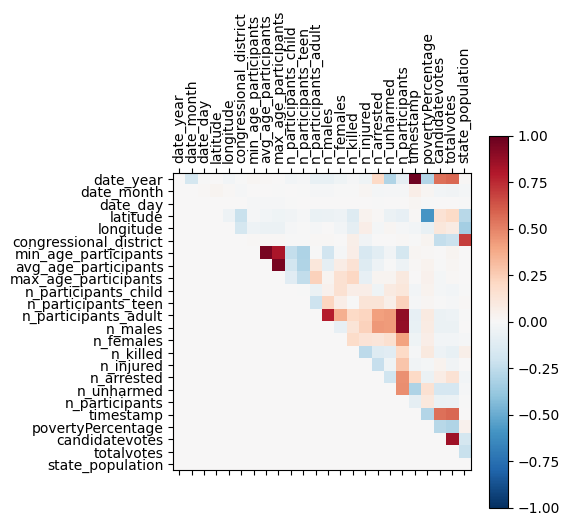

In [11]:
corr = merged.corr(numeric_only=True)
k = 3
# fetch the k more correlated pairs
# corr = corr.abs()
triag = np.triu(np.ones(corr.shape), k=1).astype(float)
corr = corr * triag
# s = corr.unstack()
# so = s.sort_values(kind="quicksort", ascending=False)
# so = so.where((so > 0) & (so < 1)).dropna()
plt.matshow(corr, cmap='RdBu_r', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

# Augmentation

In [12]:
augmented_age = merged.copy()

participants_cols = ['n_males', 'n_females', 'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed']

for col in participants_cols:
    new_col_name = 'p_' + col[2:]
    augmented_age[new_col_name] = augmented_age[col] / augmented_age['n_participants']
    
years = augmented_age['date_year'].unique()
states = augmented_age['state'].unique()
per_year = {}
for year in years:
    per_state = {}
    for state in states:
        per_state[state] = augmented_age[(augmented_age['date_year'] == year) * (augmented_age['state'] == state)]
    per_year[year] = per_state
    per_year[year]['all'] = augmented_age[augmented_age['date_year'] == year]

def avg_age_change_state(row):
    avg = row['avg_age_participants']
    state = row['state']
    year = row['date_year']
    if year not in per_year.keys():
        return 0
    affected_state = per_year[year][state]
    affected_avg = affected_state['avg_age_participants'].mean()
    return avg - affected_avg
def avg_age_change(row):
    avg = row['avg_age_participants']
    year = row['date_year']
    if year not in per_year.keys():
        return 0
    affected_all = per_year[year]['all']
    affected_all_avg = affected_all['avg_age_participants'].mean()
    return avg - affected_all_avg

augmented_age['avg_age_change_state'] = augmented_age.mapply(avg_age_change_state, axis=1)
augmented_age['avg_age_change'] = augmented_age.mapply(avg_age_change, axis=1)

# print(tabulate(augmented_age.describe(), headers='keys', tablefmt='psql'))

/home/simone/Unipi/InProgress/DM/DM/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

/home/simone/Unipi/InProgress/DM/DM/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/56 [00:00<?, ?it/s]

In [13]:
augmented_multi = augmented_age.copy()

params = participants_cols
new_params = [p + '_ratio' for p in params]

augmented_multi['week'] = np.floor(augmented_multi['timestamp'] / 7)
augmented_multi = augmented_multi.set_index(['week', 'city_or_county'])
augmented_multi = augmented_multi.sort_index()
sums = augmented_multi.groupby(['week', 'city_or_county'])[params].sum()

augmented_multi[new_params] = augmented_multi[params].div(sums, axis=0)
augmented_multi = augmented_multi.reset_index()

# Check 2013/11/21 Philadelphia with Claudia
# For now NaNs are replaced with 0
augmented_multi = augmented_multi.fillna(0)
augmented_multi = augmented_multi.drop(columns=['week'])



In [14]:
augmented_incidents = augmented_multi.copy()

# calculate the aggregated measure `number of incidents per state per month`
augmented_incidents = augmented_incidents.set_index(['date_month', 'date_year', 'state'])
augmented_incidents = augmented_incidents.sort_index()
augmented_incidents['incidents_month_state'] = augmented_incidents.groupby(['date_month', 'date_year', 'state']).size()
augmented_incidents = augmented_incidents.reset_index()

# calculate the aggregated measure `number of incidents per city per month`
augmented_incidents = augmented_incidents.set_index(['date_month', 'date_year', 'city_or_county'])
augmented_incidents = augmented_incidents.sort_index()
augmented_incidents['incidents_month_city'] = augmented_incidents.groupby(['date_month', 'date_year', 'city_or_county']).size()
augmented_incidents = augmented_incidents.reset_index()

# scale previous measures on totalVotes
augmented_incidents['incidents_month_state_scaled'] = augmented_incidents['incidents_month_state'] / augmented_incidents['totalvotes']
augmented_incidents['incidents_month_city_scaled'] = augmented_incidents['incidents_month_city'] / augmented_incidents['totalvotes']

# Percentage of REPUBLICAN and DEMOCRAT votes
REP_df = augmented_incidents[augmented_incidents['party'] == 'REPUBLICAN'].copy()
DEM_df = augmented_incidents[augmented_incidents['party'] == 'DEMOCRAT'].copy()
REP_df['percentage_republican'] = REP_df['candidatevotes'] / REP_df['totalvotes']
REP_df['percentage_democrat'] = 1 - (REP_df['candidatevotes'] / REP_df['totalvotes'])
DEM_df['percentage_democrat'] = DEM_df['candidatevotes'] / DEM_df['totalvotes']
DEM_df['percentage_republican'] = 1 - (DEM_df['candidatevotes'] / DEM_df['totalvotes'])
augmented_incidents = pd.concat([REP_df, DEM_df], ignore_index=True).reset_index(drop=True)

In [15]:
import re
regex = re.compile('[^a-zA-Z0-9]')
def rename(s):
    return regex.sub('_', s)

augmented_charateristics = augmented_incidents.copy()

# find the k most common incident_characteristics1 among the entire dataset
k = 4
vc = augmented_charateristics['incident_characteristics1'].value_counts()
most_common = vc.head(k).index.tolist()

augmented_charateristics = augmented_charateristics.set_index(['date_year', 'date_month', 'state', 'incident_characteristics1'])
augmented_charateristics = augmented_charateristics.sort_index()
something = augmented_charateristics.groupby(['date_year', 'date_month', 'state', 'incident_characteristics1']).size()
morething = augmented_charateristics.groupby(['date_year', 'date_month', 'state']).size()


# create a column for each of the k most common incident_characteristics1 plus a column for the others
for c in most_common:
    nc = rename(c)
    nc = 'state_month_' + nc
    perc_state_month = something.xs(c, level='incident_characteristics1') / morething
    perc_state_month.fillna(0, inplace=True)
    augmented_charateristics[nc] = perc_state_month
nc = 'state_month_OTHER'
perc_state_month = 1 - augmented_charateristics[['state_month_' + rename(c) for c in most_common]].sum(axis=1)
augmented_charateristics[nc] = perc_state_month

augmented_charateristics = augmented_charateristics.reset_index()


augmented_charateristics = augmented_charateristics.set_index(['date_year', 'date_month', 'state', 'congressional_district', 'incident_characteristics1'])
augmented_charateristics = augmented_charateristics.sort_index()
something = augmented_charateristics.groupby(['date_year', 'date_month', 'state', 'congressional_district', 'incident_characteristics1']).size()
morething = augmented_charateristics.groupby(['date_year', 'date_month', 'state', 'congressional_district']).size()


# create a column for each of the k most common incident_characteristics1 plus a column for the others
for c in most_common:
    nc = rename(c)
    nc = 'cd_month_' + nc
    perc_state_month = something.xs(c, level='incident_characteristics1') / morething
    perc_state_month.fillna(0, inplace=True)
    augmented_charateristics[nc] = perc_state_month
nc = 'cd_month_OTHER'
perc_state_month = 1 - augmented_charateristics[['cd_month_' + rename(c) for c in most_common]].sum(axis=1)
augmented_charateristics[nc] = perc_state_month

augmented_charateristics = augmented_charateristics.reset_index()

In [16]:
deoutlied = augmented_charateristics.copy()
numeric_cols = deoutlied.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)
numeric_cols = numeric_cols.drop(['date_year', 'date_month', 'date_day', 'timestamp', 'latitude', 'longitude', 'congressional_district'])
for col in numeric_cols:
    q1 = deoutlied[col].quantile(0.25)
    q3 = deoutlied[col].quantile(0.75)
    iqr = q3 - q1
    fence_low  = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    deoutlied = deoutlied[(deoutlied[col] >= fence_low) * (deoutlied[col] <= fence_high)]

# pd.plotting.scatter_matrix(deoutlied[to_corr], alpha=0.2, figsize=(20, 20), diagonal='hist', s=1.2)


Index(['date_year', 'date_month', 'congressional_district', 'date_day',
       'latitude', 'longitude', 'min_age_participants', 'avg_age_participants',
       'max_age_participants', 'n_participants_child', 'n_participants_teen',
       'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured',
       'n_arrested', 'n_unharmed', 'n_participants', 'timestamp',
       'povertyPercentage', 'candidatevotes', 'totalvotes', 'state_population',
       'p_males', 'p_females', 'p_participants_child', 'p_participants_teen',
       'p_participants_adult', 'p_killed', 'p_injured', 'p_arrested',
       'p_unharmed', 'avg_age_change_state', 'avg_age_change', 'n_males_ratio',
       'n_females_ratio', 'n_participants_child_ratio',
       'n_participants_teen_ratio', 'n_participants_adult_ratio',
       'n_killed_ratio', 'n_injured_ratio', 'n_arrested_ratio',
       'n_unharmed_ratio', 'incidents_month_state', 'incidents_month_city',
       'incidents_month_state_scaled', 'incidents_mont

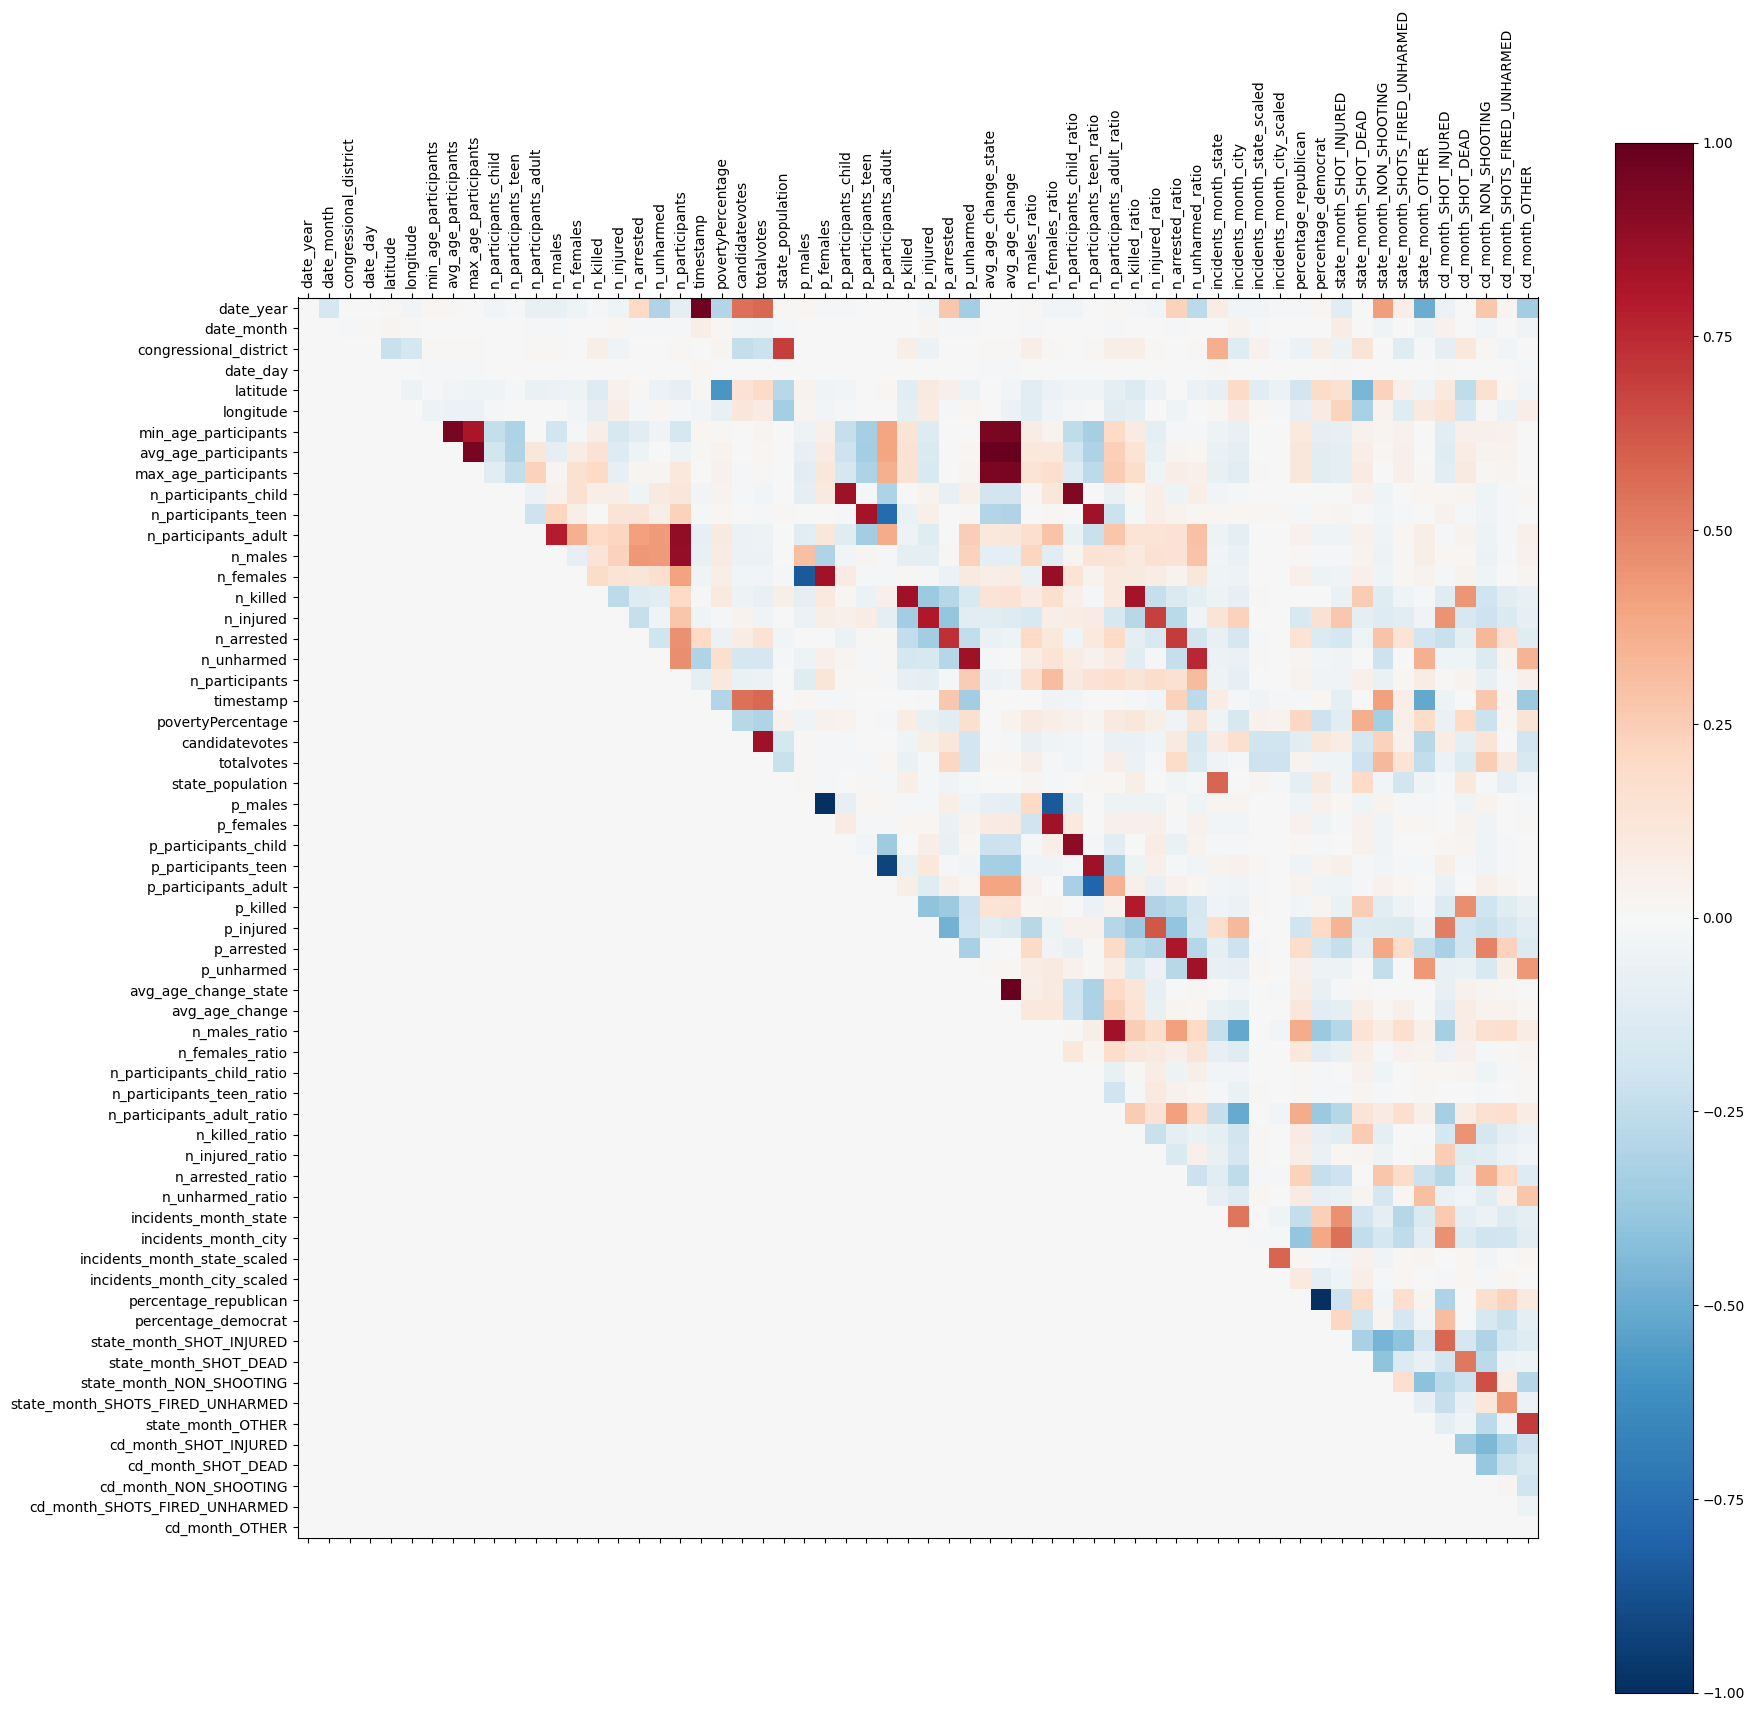

In [17]:
corr = augmented_charateristics.corr(numeric_only=True)
# corr = corr.abs()
triag = np.triu(np.ones(corr.shape), k=1).astype(float)
corr = corr * triag
# s = corr.unstack()
# so = s.sort_values(kind="quicksort", ascending=False)
# so = so.where((so > 0) & (so < 1)).dropna()
plt.figure(figsize=(20,20))
plt.matshow(corr, cmap='RdBu_r', vmin=-1, vmax=1, fignum=1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
# change figsize
plt.show()

number of plots: 62


/tmp/ipykernel_11246/170521551.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


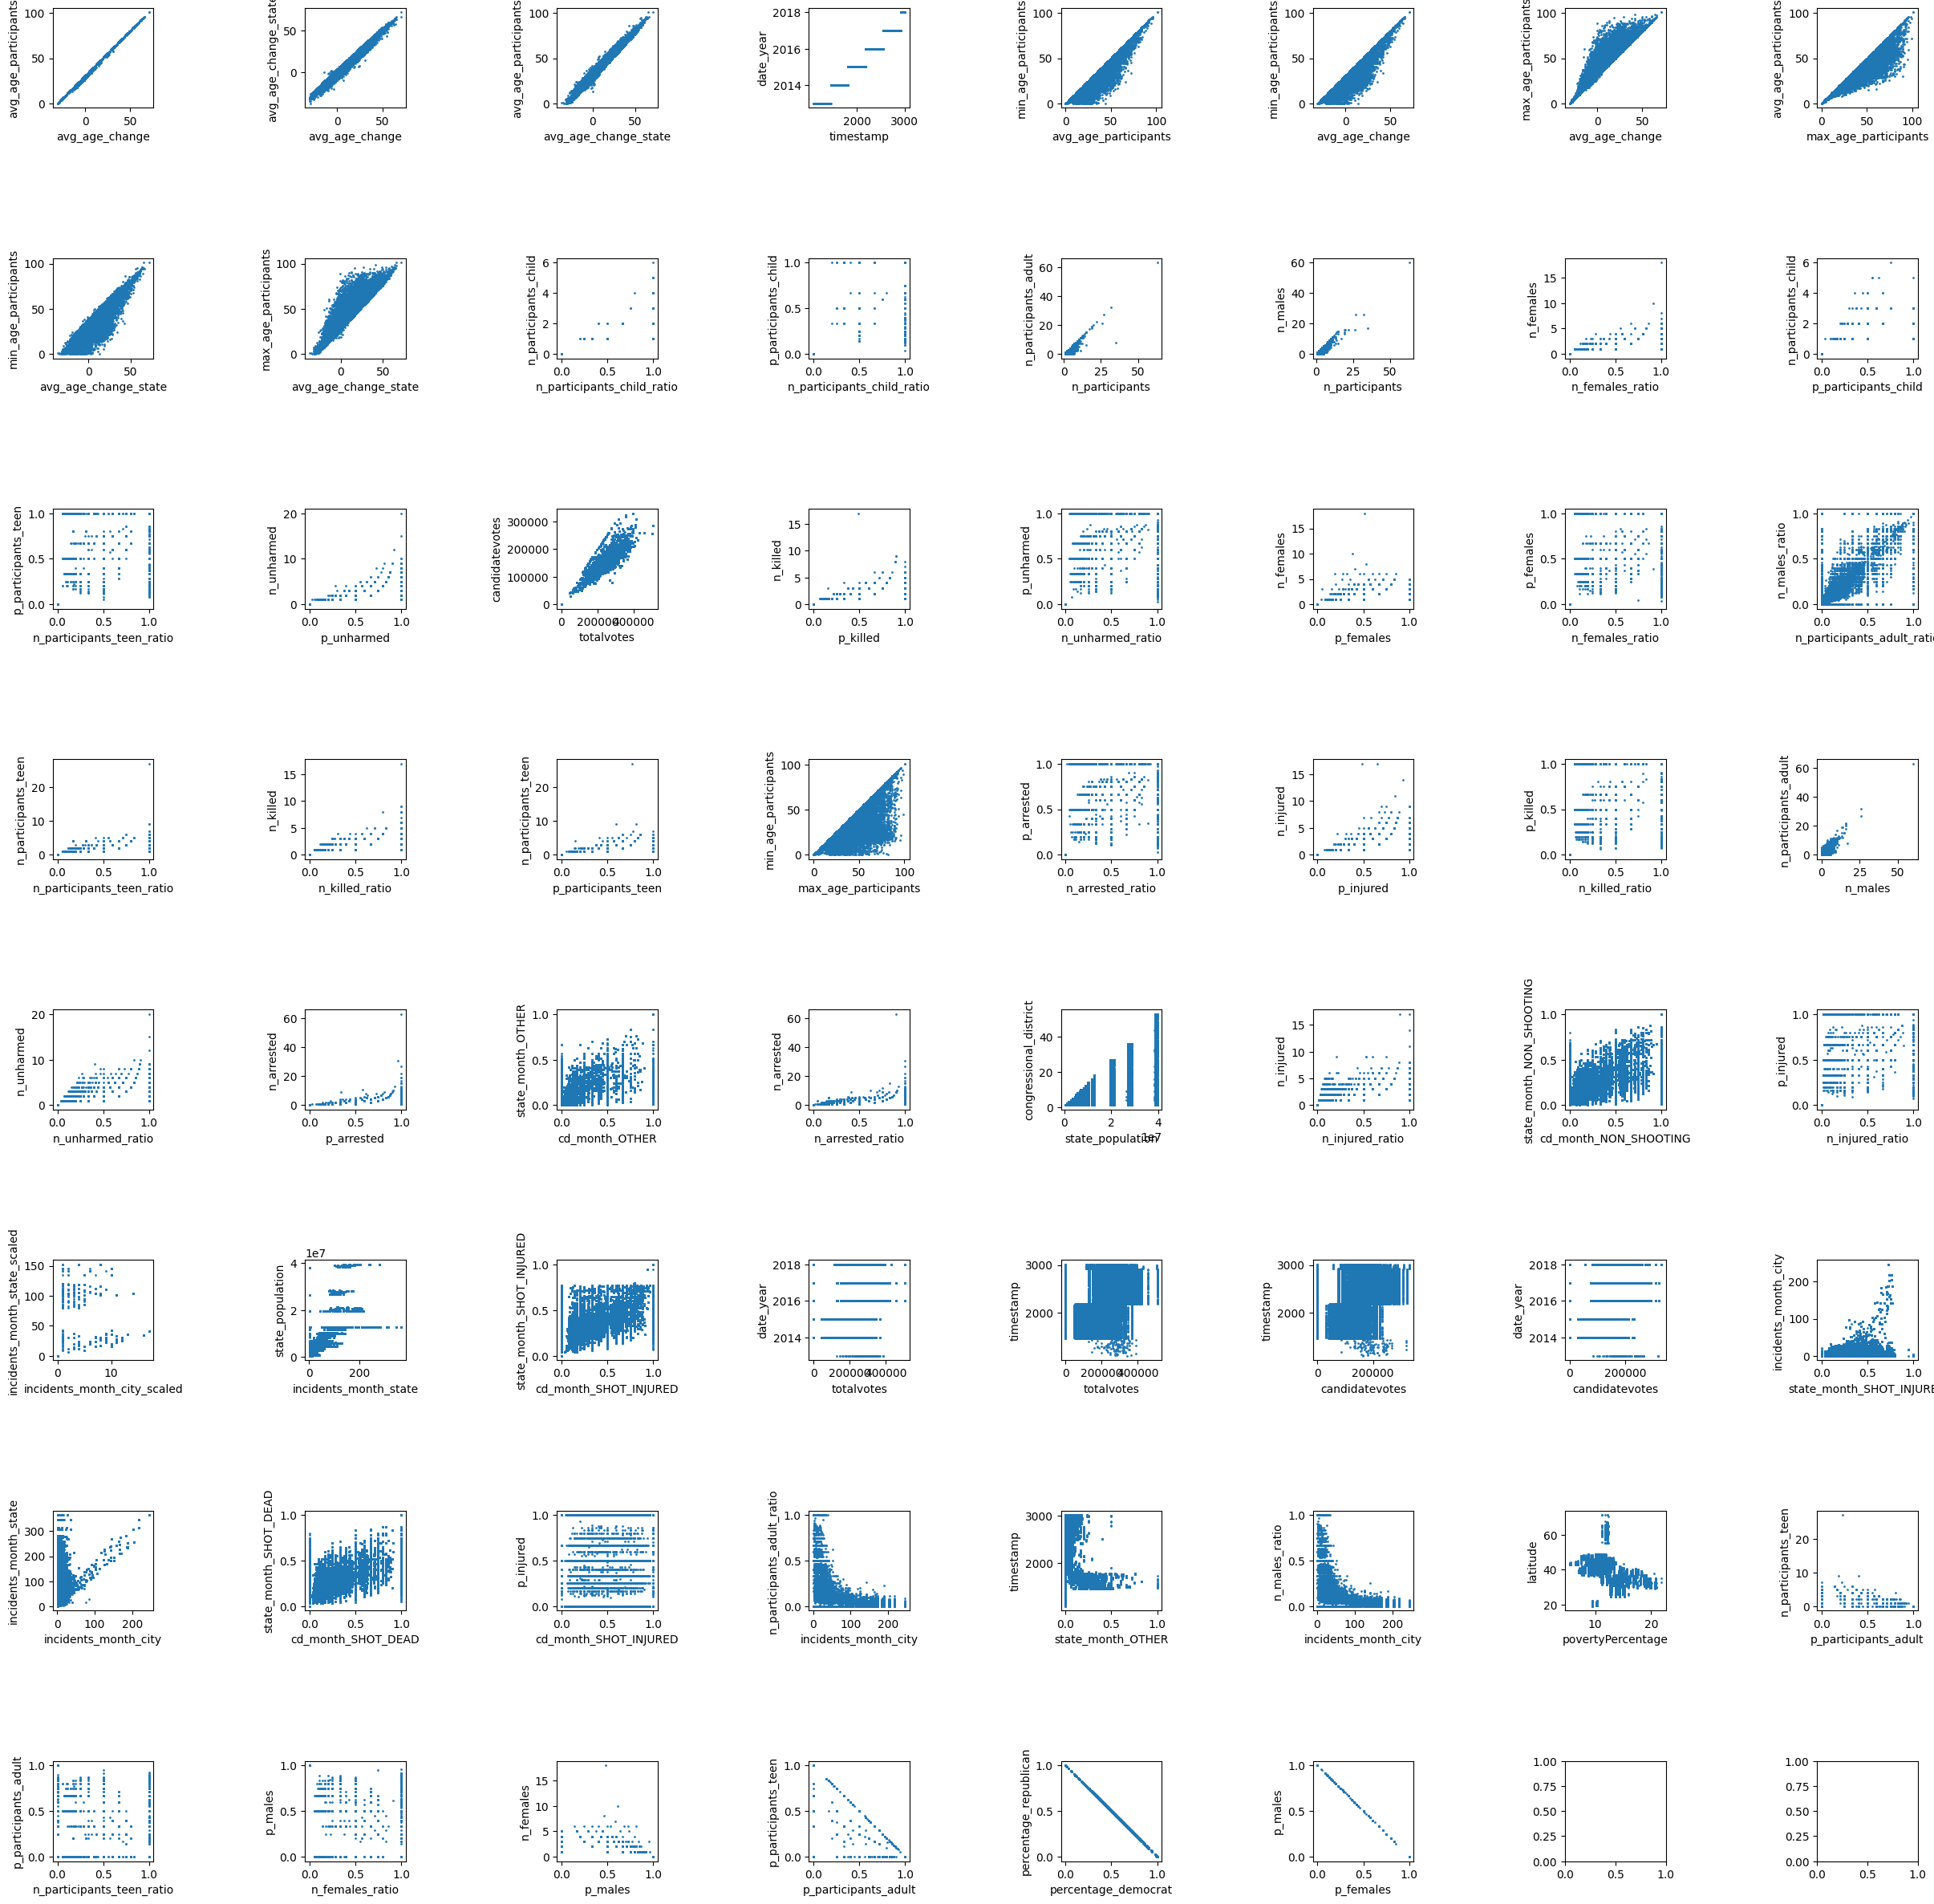

In [18]:
# fetch only corrs that are 0.5 or more
f_corr = corr.where((corr > 0.5) | (corr < -0.5)).dropna(how='all', axis=0).dropna(how='all', axis=1)
f_corr = f_corr.where((corr < 0.9) | (corr > -0.9)).dropna(how='all', axis=0).dropna(how='all', axis=1)
f_corr = f_corr.unstack().dropna().sort_values(kind="quicksort", ascending=False)
print(f"number of plots: {f_corr.shape[0]}")
# scatter plots of the most correlated pairs
fig, axs = plt.subplots(int(np.ceil(np.sqrt(len(f_corr)))), int(np.ceil(np.sqrt(len(f_corr)))), figsize=(30, 30))
# add some space between subplots
fig.subplots_adjust(hspace=1.5, wspace=1.5)
for i, (col1, col2) in enumerate(f_corr.index):
    ax = axs[i // int(np.ceil(np.sqrt(len(f_corr)))), i % int(np.ceil(np.sqrt(len(f_corr))))] if len(f_corr) > 1 else axs
    ax.scatter(augmented_charateristics[col1], augmented_charateristics[col2], s=1)
    ax.set_xlabel(col1[:30])
    ax.set_ylabel(col2[:30])

fig.show()

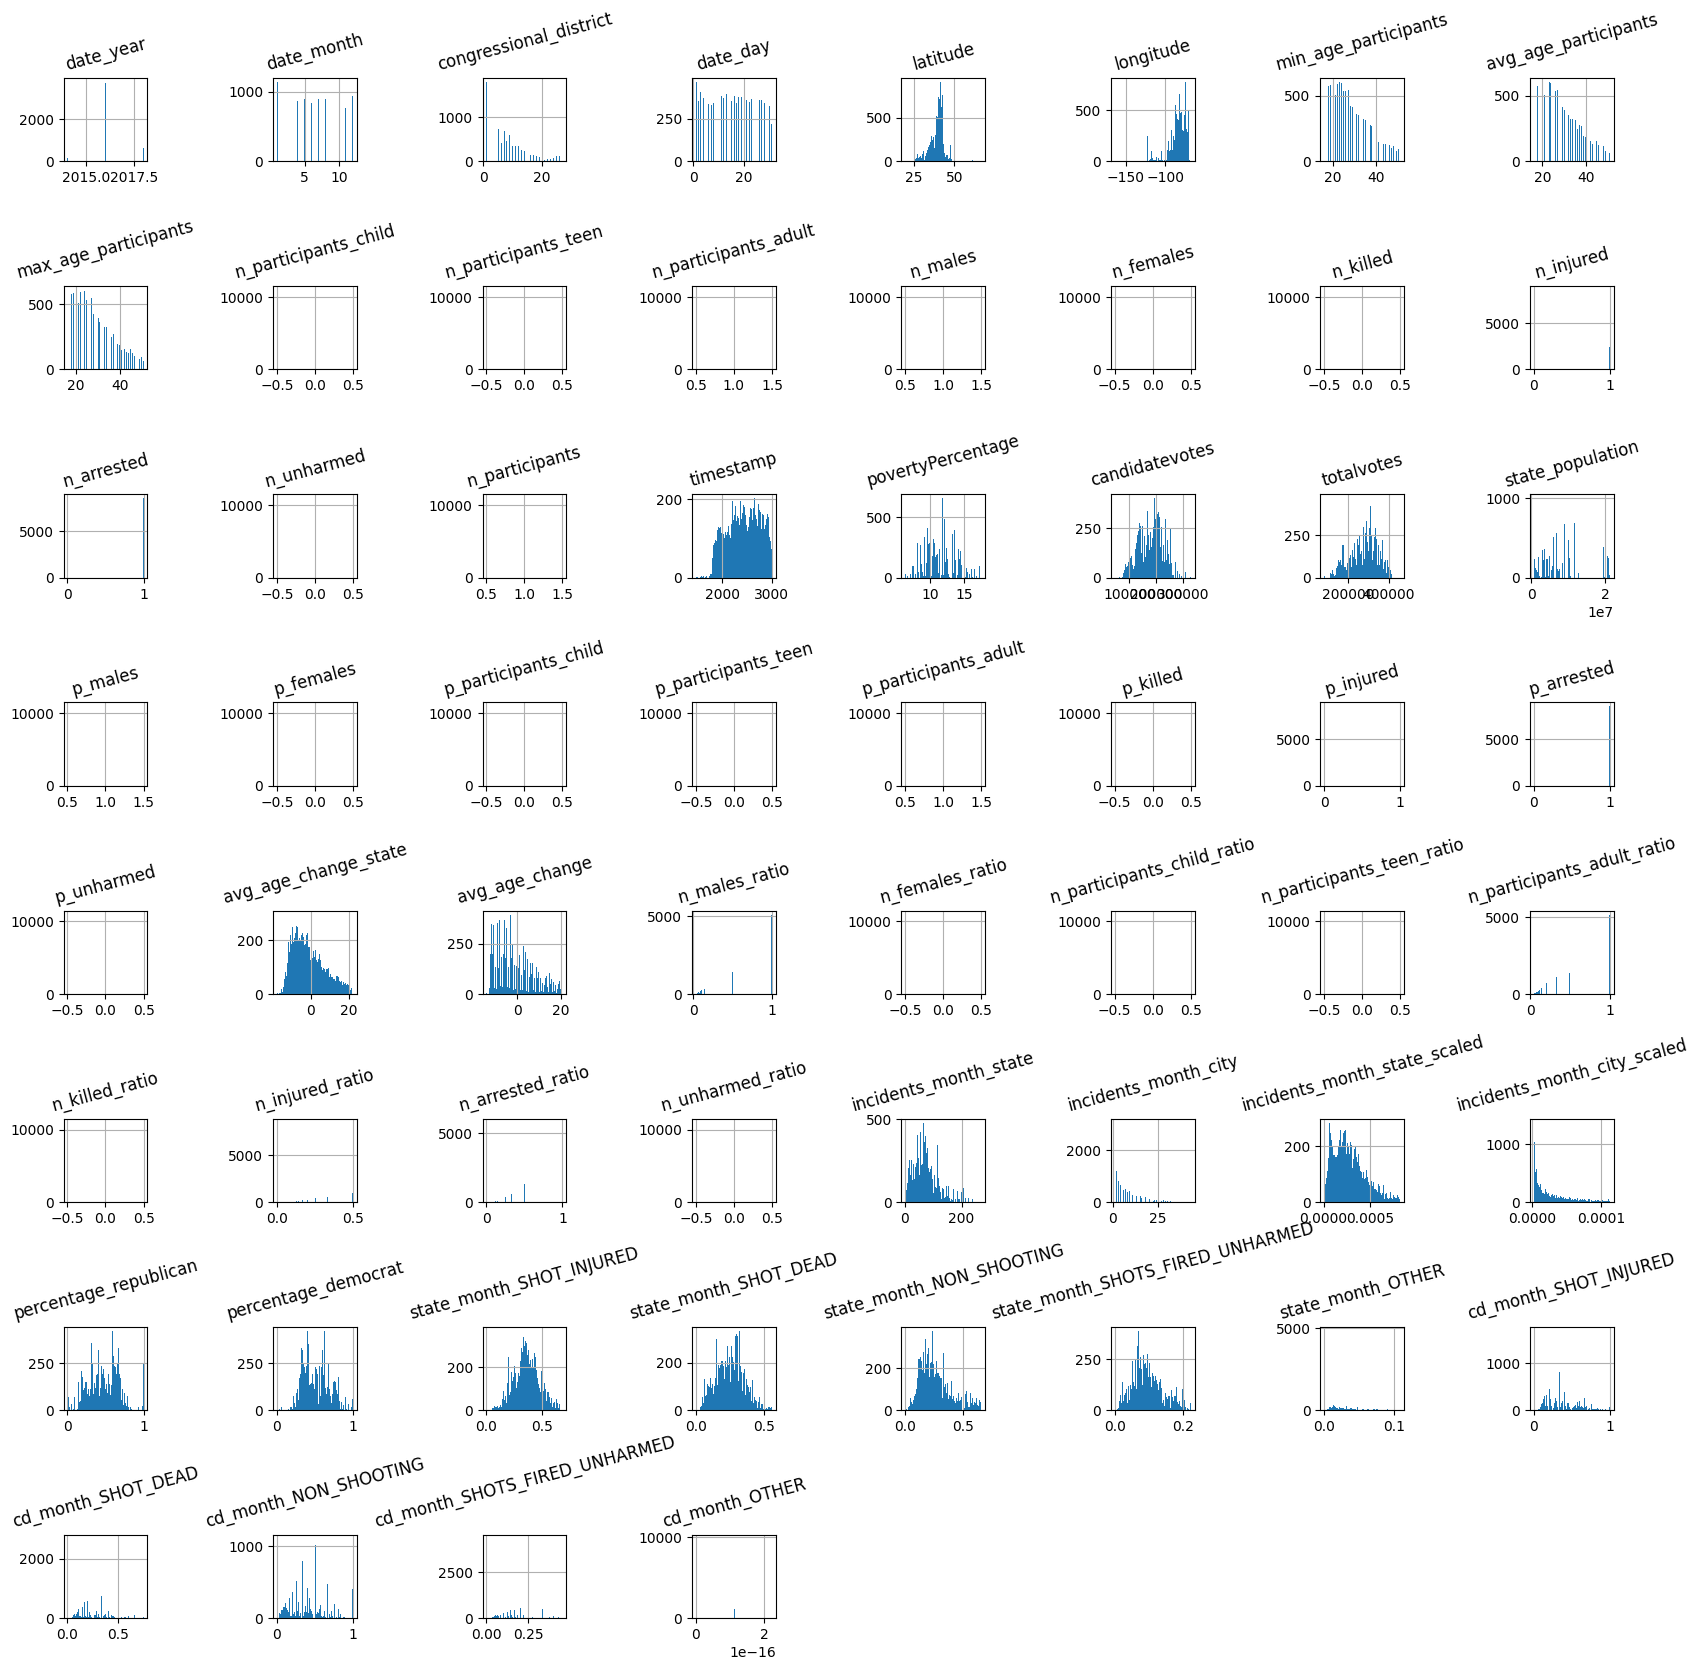

In [19]:
deoutlied.hist(bins=100, figsize=(20, 20));
plt.subplots_adjust(hspace=1.5, wspace=1.5);
# rotate titles
[x.title.set_rotation(15) for x in plt.gcf().axes];

In [20]:
final_clean = augmented_charateristics.copy()

# K-means test

100%|██████████| 28/28 [05:23<00:00, 11.55s/it]


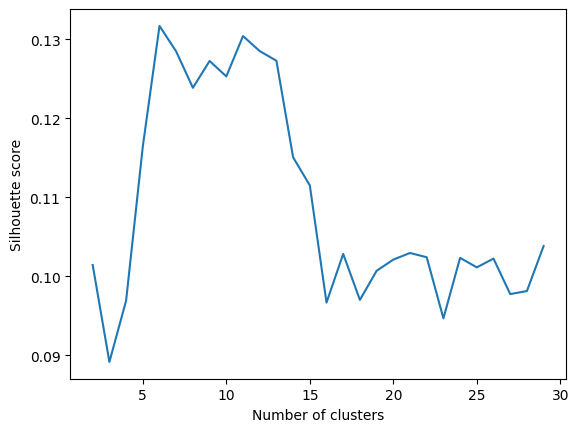

In [21]:
if True:
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    from tqdm import tqdm

    numeric_cols = final_clean.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = numeric_cols.drop(['date_year', 'date_month', 'date_day', 'timestamp', 'latitude', 'longitude', 'congressional_district'])
    numeric = final_clean[numeric_cols].copy()

    k_min = 2
    k_max = 30

    # Sample
    numeric = numeric.sample(frac=0.1)

    # Standardize
    scaler = StandardScaler()
    numeric_scaled = scaler.fit_transform(numeric)

    # PCA
    pca = PCA(n_components=2)
    numeric_pca = pca.fit_transform(numeric_scaled)

    # KMeans
    scores = []
    for k in tqdm(range(k_min, k_max)):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=42).fit(numeric_scaled)
        score = silhouette_score(numeric_scaled, kmeans.labels_)
        scores.append(score)

    plt.plot(range(k_min, k_max), scores)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.show()



In [22]:
scores

[0.10141834708341128,
 0.0891513660256962,
 0.0969036071302073,
 0.11641642512280607,
 0.13168661520678043,
 0.12844718750057096,
 0.12385184270604345,
 0.12725017265152644,
 0.1252957446298433,
 0.13040384228265503,
 0.12850041749909016,
 0.12727934646793562,
 0.1150543409986968,
 0.11150684165014184,
 0.0966595099093132,
 0.1028258693260706,
 0.09700155270488094,
 0.10068497709717363,
 0.10210211949381763,
 0.1029432992447572,
 0.10240157425611278,
 0.09467045008245353,
 0.10232714230079218,
 0.1011235764834916,
 0.1022290652369784,
 0.09773663892866412,
 0.09812765457141712,
 0.10381867376158316]

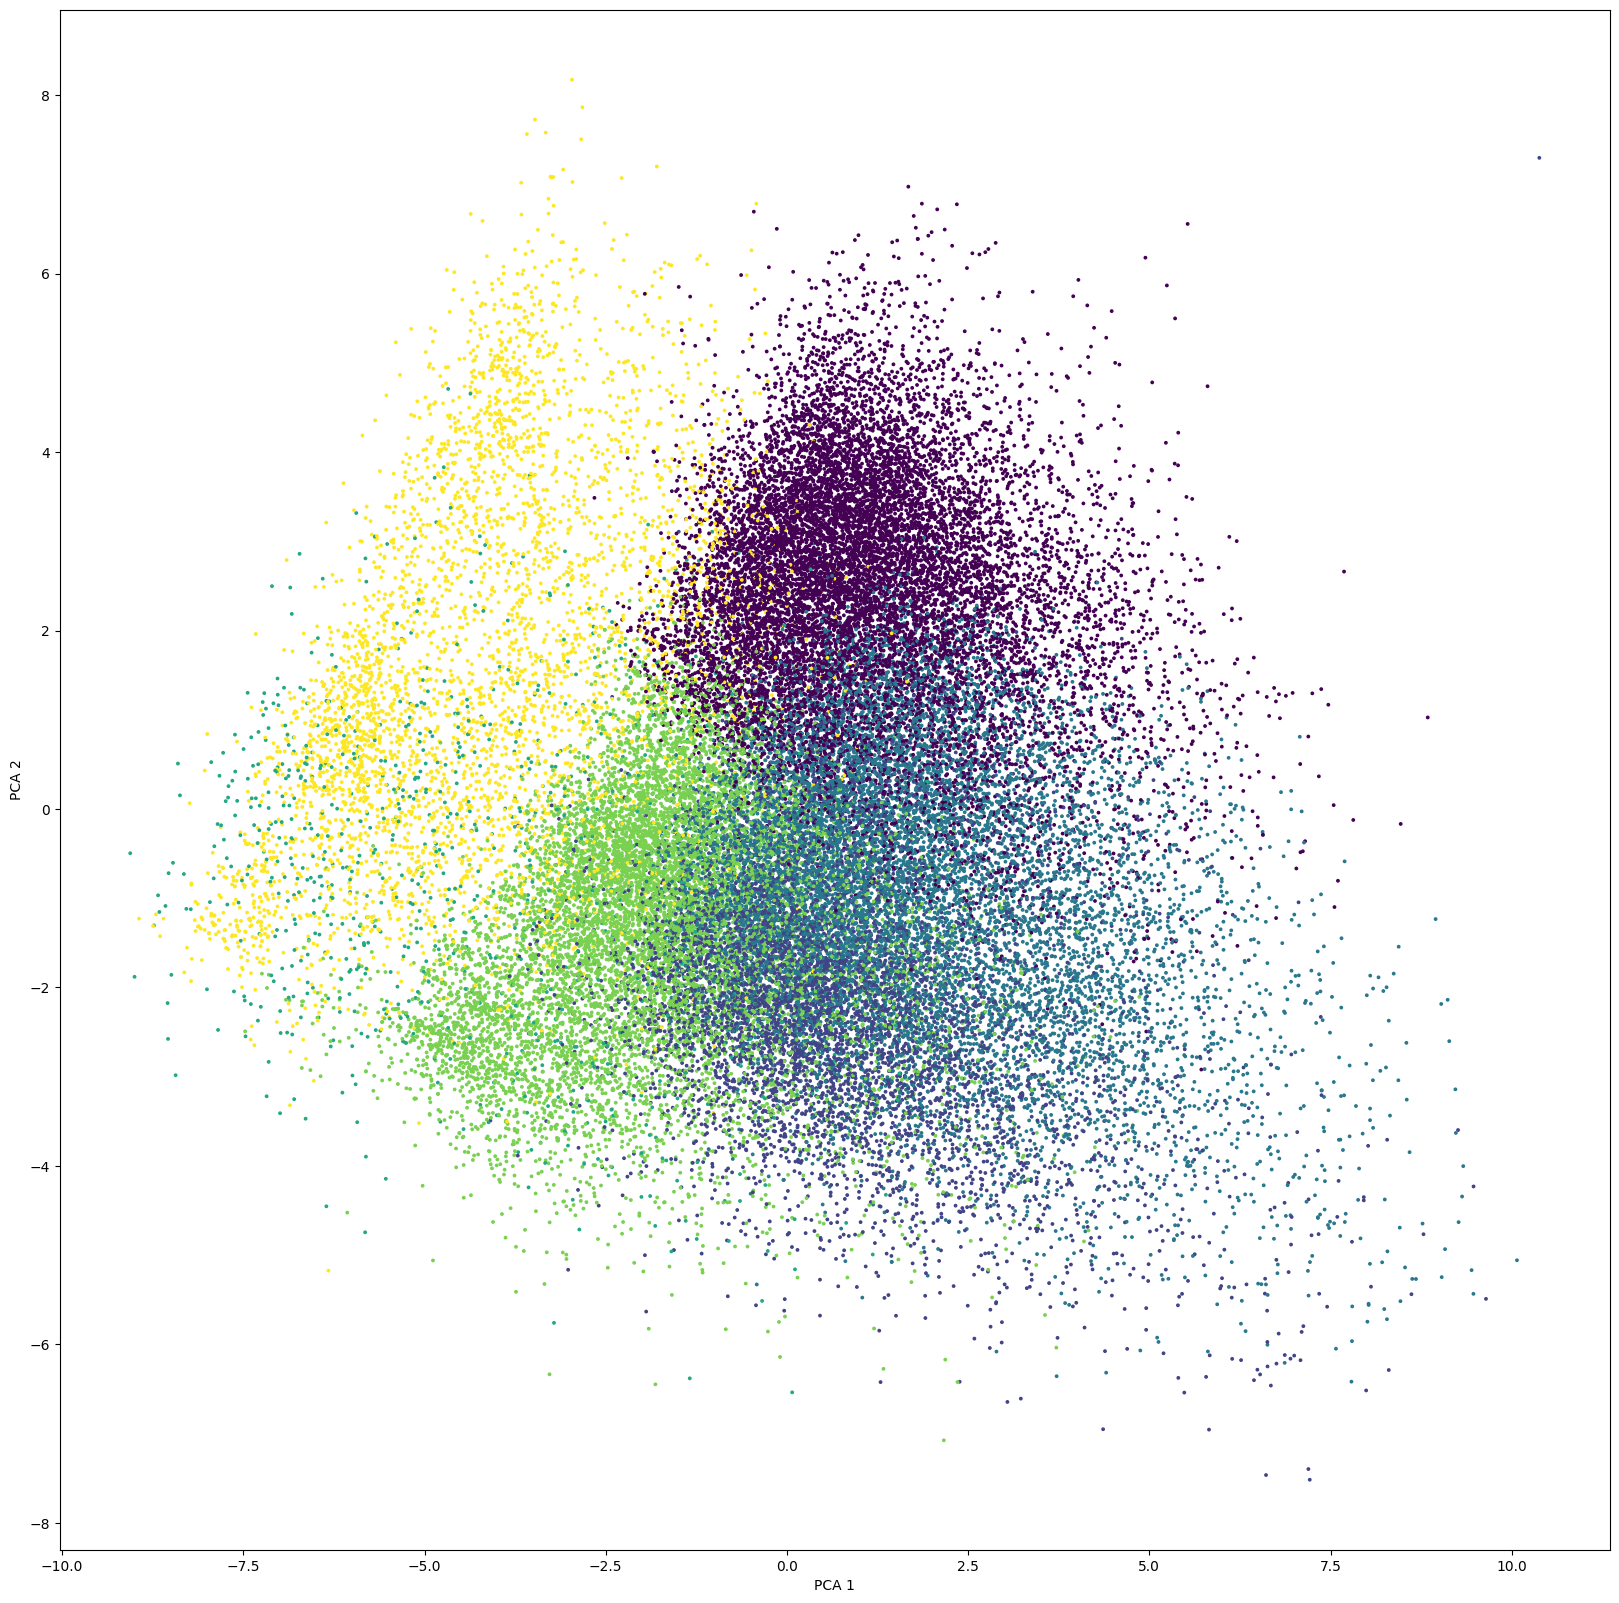

In [23]:
if True:
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.cluster import KMeans

    sample = final_clean.sample(frac=0.4)

    numeric_cols = sample.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = numeric_cols.drop(['date_year', 'date_month', 'date_day', 'timestamp', 'latitude', 'longitude', 'congressional_district'])
    numeric = sample[numeric_cols].copy()

    k_min = 2
    k_max = 20

    # Sample
    # Standardize
    scaler = StandardScaler()
    numeric_scaled = scaler.fit_transform(numeric)

    # PCA
    pca = PCA(n_components=2)
    numeric_pca = pca.fit_transform(numeric_scaled)

    # KMeans
    scores = []
    k = 6
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=42).fit(numeric_scaled)

    # Plot
    plt.figure(figsize=(20, 20))
    plt.scatter(numeric_pca[:, 0], numeric_pca[:, 1], c=kmeans.labels_, s=3)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()


ValueError: `bins` must increase monotonically, when an array

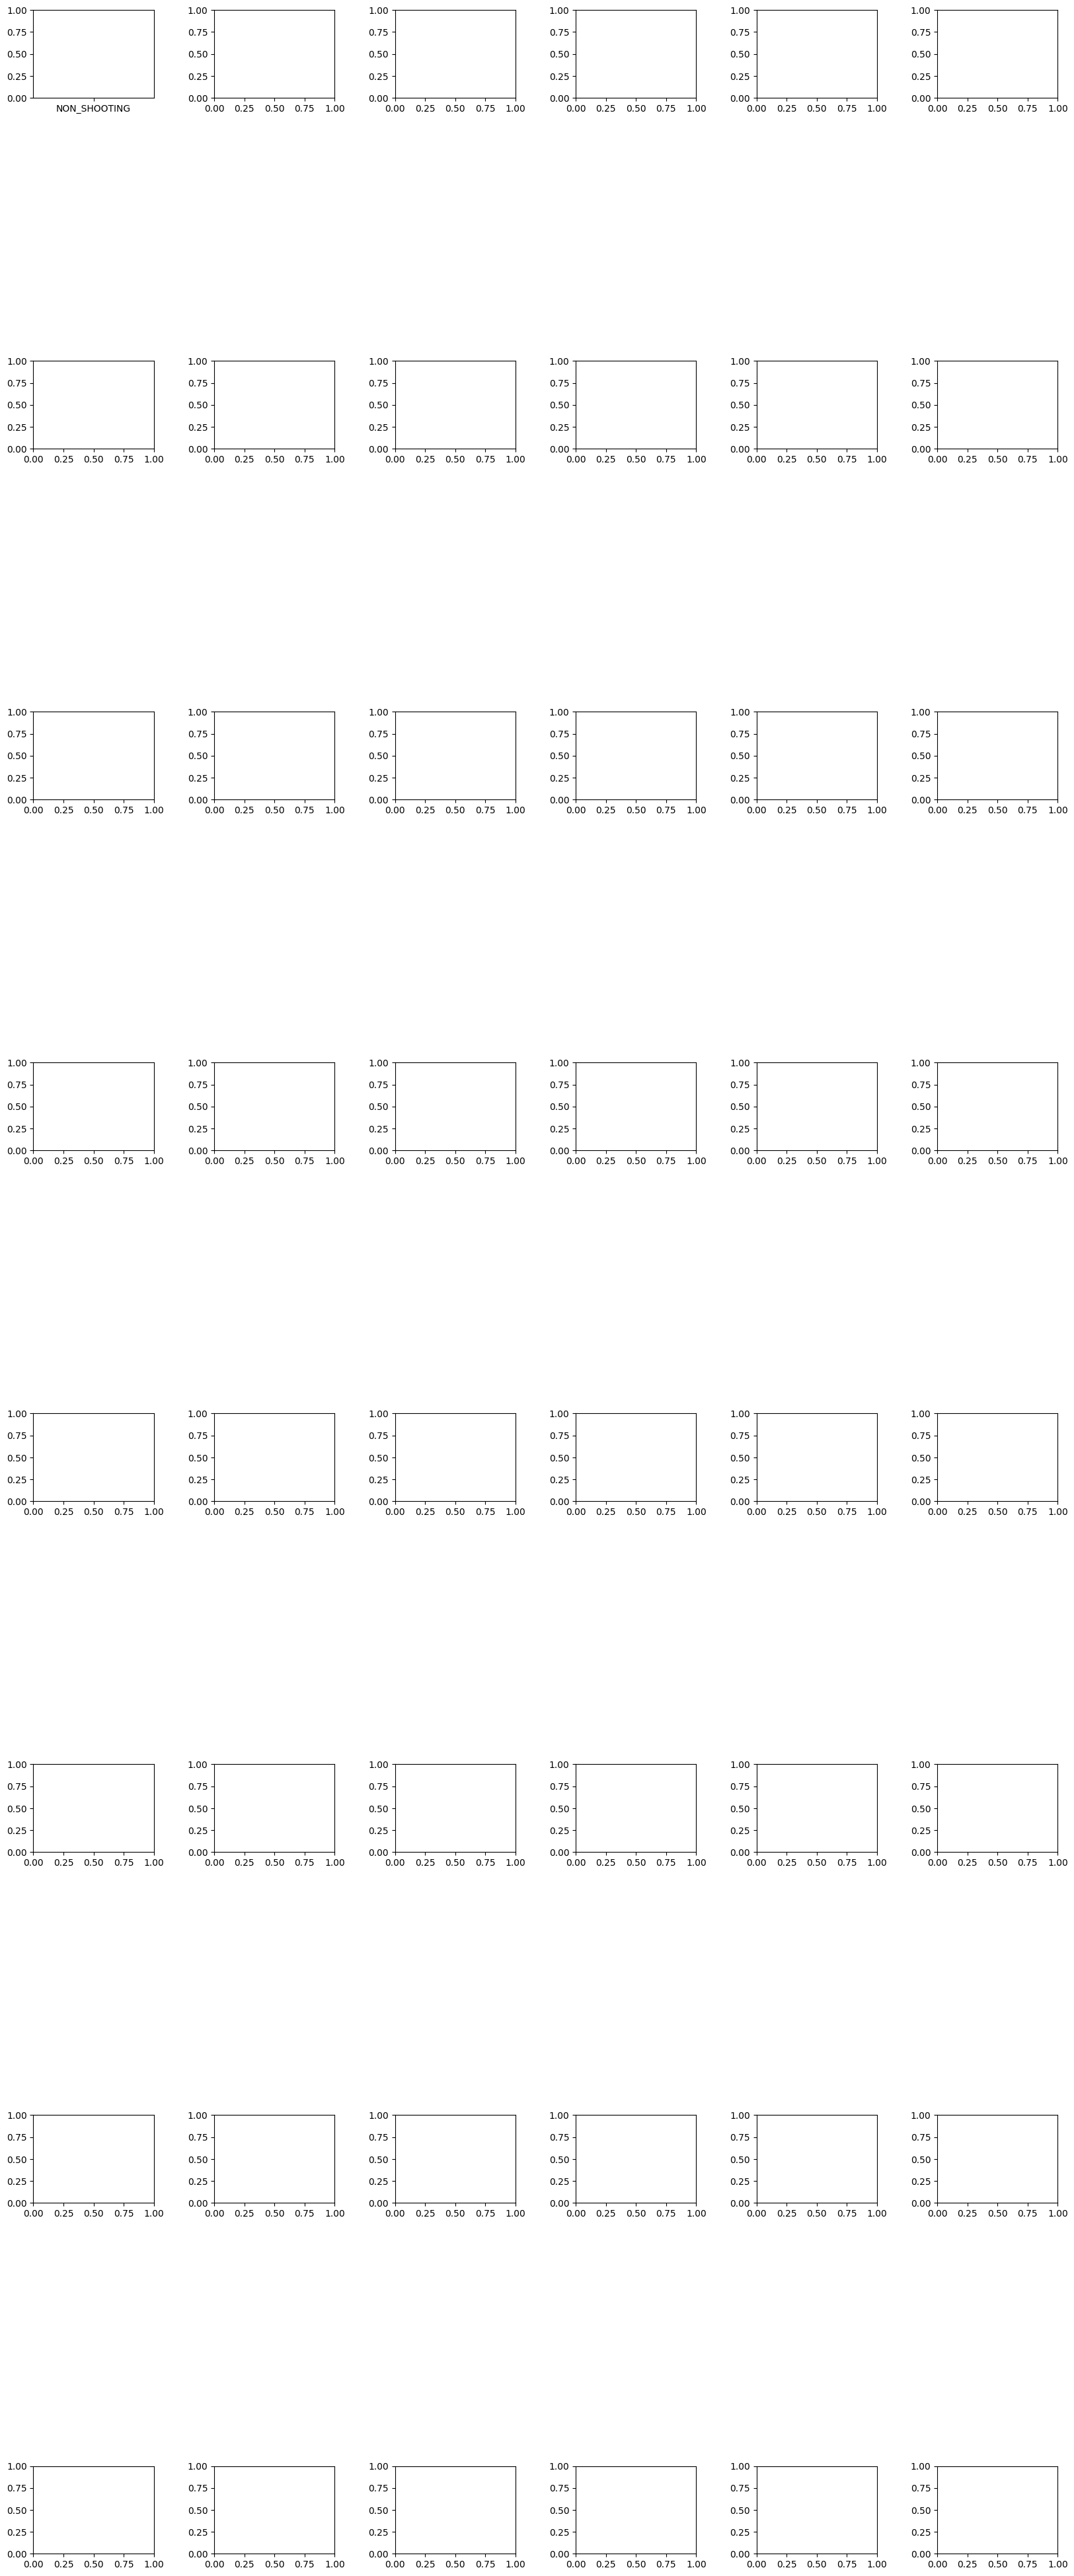

In [35]:
categorical = sample.select_dtypes(include=['object']).columns.drop(['state', 'city_or_county'])
# in categorical add numerical with less than 10 unique values

categorical = categorical.append(sample.select_dtypes(include=['int64', 'float64']).columns[sample.select_dtypes(include=['int64', 'float64']).nunique() < 10])


fig, ax = plt.subplots(len(categorical), k, figsize=(20, 50))
fig.subplots_adjust(hspace=3, wspace=.5)
for i, col in enumerate(categorical):
    for j in range(k):
        labels = sample[col].unique()
        ax[i, j].hist(sample[col][kmeans.labels_ == j], )
        ax[i, j].set_title(f'Cluster {j}')
        ax[i, j].set_xlabel(col)
        ax[i, j].set_ylabel('Count')
        # rotate x labels
        [x.set_rotation(90) for x in ax[i, j].get_xticklabels()];
    break

In [41]:
# show centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids = pd.DataFrame(centroids, columns=numeric_cols)
centroids = centroids.T
centroids.columns = [f'Cluster {i}' for i in range(k)]
centroids = centroids.convert_dtypes().round(2)
centroids

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
min_age_participants,30.26,29.99,33.73,6.78,27.78,15.89
avg_age_participants,31.47,32.02,35.93,13.22,28.61,17.45
max_age_participants,32.83,34.27,38.22,19.53,29.51,19.3
n_participants_child,0.0,0.0,0.0,1.16,0.0,0.0
n_participants_teen,0.01,0.05,0.01,0.11,0.01,1.29
n_participants_adult,1.55,2.34,1.62,1.09,1.38,0.59
n_males,1.4,2.05,1.35,1.64,1.24,1.69
n_females,0.16,0.34,0.27,0.72,0.16,0.19
n_killed,0.05,0.2,1.14,0.56,0.11,0.3
n_injured,0.16,0.43,0.09,0.78,1.11,0.62


# DBSCAN test

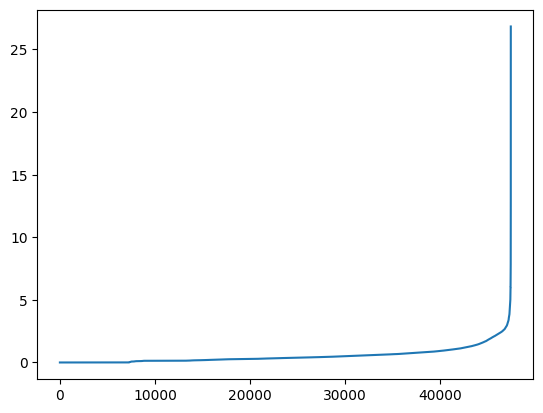

[-1  0  1  2  3]
(47454,)
(47454, 17)


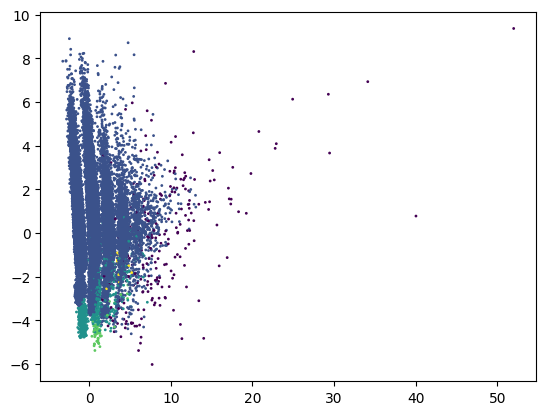

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

numeric_cols = final_clean.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop(['date_year', 'date_month', 'date_day', 'timestamp', 'latitude', 'longitude', 'congressional_district'])
numeric = final_clean[numeric_cols].copy()

k_min = 2
k_max = 20

# Sample
numeric = numeric.sample(frac=0.4)

# Standardize
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric)

# NN
nn = NearestNeighbors(n_neighbors=1*numeric_cols.shape[0])
nn.fit(numeric_scaled)
distances, indices = nn.kneighbors(numeric_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()


# DBSCAN
dbs = DBSCAN(eps=4, min_samples=1*numeric_cols.shape[0])
dbs.fit(numeric_scaled)
labels = dbs.labels_
print(np.unique(labels))
print(labels.shape)
print(numeric_scaled.shape)

# UMAP
umap = PCA(n_components=2)
numeric_umap = umap.fit_transform(numeric_scaled)

plt.scatter(numeric_umap[:, 0], numeric_umap[:, 1], s=1, c=labels)
plt.show()

